# Unsupervised Learning applied to Customer Lifetime Value (CLV)

![](https://wilsonprintingusa.com/wp-content/uploads/2015/02/Customer-Lifetime-Value-Wilson-Printing.jpg)

# Prepare Workspace

In [1]:
# Upload libraries
from numpy.random import seed
seed(1)
import tensorflow.keras
tensorflow.random.set_seed(2)

# to handle datasets
import numpy as np
import pandas as pd
import datetime

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# for statistics
import statistics as st 
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# to split data set 
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# to build models
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# dimensionality reductiion
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from keras.layers import Input,Dense
from keras.models import Model

# clustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# to evaluate models
from sklearn.metrics import median_absolute_error
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AutoInsurance.csv')

# Data set Overview

In [3]:
# Dimensions of data set
print(df.shape)

(9134, 24)


In [4]:
# List types for each attribute
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# Take a peek at the first rows of the data
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Data Cleaning & Handling Variables Activity

In [6]:
# Change format Date
df_1 = df.copy()
df_1['Effective_Date'] = pd.to_datetime(df_1['Effective To Date'])

### Handling Missing Values

In [7]:
# Check missing values both to numeric features and categorical features 
missing = df_1.isnull().sum()/df_1.shape[0]*100
missing

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
Effective_Date                   0.0
dtype: float64

In [8]:
# Min Value Effective to Date Policy
df_1['Effective_Date'].min()

Timestamp('2011-01-01 00:00:00')

In [9]:
# Max Value Effective to Date Policy
df_1['Effective_Date'].max()

Timestamp('2011-12-02 00:00:00')

In [10]:
# End of Year (eoy) of the current Effective to Date
df_1['eoy_Effective_Date'] = pd.to_datetime('2011-12-31')

In [11]:
# Days missing to the end of the current year from effective to date
df_1['eoy_missing_days'] = (df_1['eoy_Effective_Date'] - df_1['Effective_Date']).dt.days

In [12]:
# check duplicates
df_1_duplicates = df_1[df_1.duplicated(['Customer'])]

In [13]:
df_1_duplicates

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective_Date,eoy_Effective_Date,eoy_missing_days


In [14]:
df_1 = df_1.drop(['Customer','Effective To Date','eoy_Effective_Date'], axis=1)

In [15]:
# Rename some features for a practical use
df_new = df_1.copy()
df_new = df_new.rename(columns={"Customer Lifetime Value":"Customer_Lifetime_Value","Location Code":"Location_Code","Marital Status":"Marital_Status","Monthly Premium Auto":"Monthly_Premium_Auto","Months Since Last Claim":"Months_Since_Last_Claim",
                           "Months Since Policy Inception":"Months_Since_Policy_Inception","Number of Open Complaints":"Number_of_Open_Complaints","Number of Policies":"Number_of_Policies",
                           "Policy Type":"Policy_Type","Renew Offer Type":"Renew_Offer_Type","Sales Channel":"Sales_Channel","Total Claim Amount":"Total_Claim_Amount",
                           "Vehicle Class":"Vehicle_Class","Vehicle Size":"Vehicle_Size"})

# Summary Statistics

In [16]:
# Summarize attribute distributions for data type of variables
obj_cols = [var for var in df_new.columns if df_new[var].dtype=='object']
df_new[obj_cols].describe().T

,count,unique,top,freq
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location_Code,9134,3,Suburban,5779
Marital_Status,9134,3,Married,5298
Policy_Type,9134,3,Personal Auto,6788
Policy,9134,9,Personal L3,3426


In [17]:
# Summarize attribute distributions for data type of variables
no_obj_cols = [var for var in df_new.columns if df_new[var].dtype!='object']
df_new[no_obj_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Lifetime_Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly_Premium_Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months_Since_Last_Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months_Since_Policy_Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number_of_Open_Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number_of_Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total_Claim_Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
eoy_missing_days,9134.0,276.667068,93.820412,29.000000,244.000000,315.000000,340.000000,364.000000


In [18]:
# Split data set between target variable and features
X_full = df_new.copy()
y = X_full.Customer_Lifetime_Value
X_full.drop(['Customer_Lifetime_Value'], axis=1, inplace=True)

In [19]:
# Select numerical columns
numerical_cols = [cname for cname in X_full.columns if 
                X_full[cname].dtype in ['float64','int64']]

In [20]:
# Subset with numerical features
num = X_full[numerical_cols]
num.columns

Index(['Income', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Total_Claim_Amount', 'eoy_missing_days'],
      dtype='object')

In [21]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_full.columns if
                    X_full[cname].nunique() <= 15 and 
                    X_full[cname].dtype == "object"]

In [22]:
# Subset with categorical features
cat = X_full[categorical_cols]
cat.columns


Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location_Code', 'Marital_Status', 'Policy_Type', 'Policy',
       'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

# Clustering numerical features with DBSCAN

In [23]:
# Standardization of data
sc = StandardScaler()
num_sc = sc.fit_transform(num)

In [24]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(num_sc)
distances, indices = nbrs.kneighbors(num_sc)

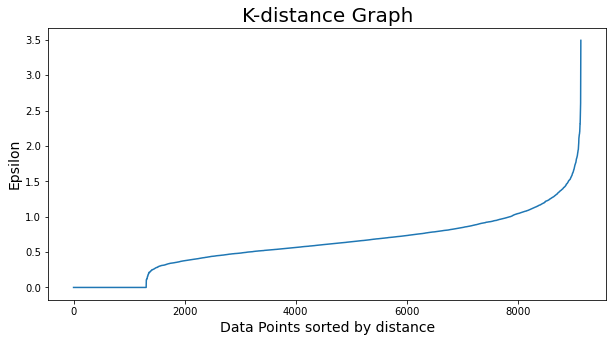

In [25]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [26]:
silhouette_d = []
n_cluster_d = []
np.random.seed(0)
n_samples = []
for samples in range(5,20):
    clustering = DBSCAN(eps=1.25, min_samples=samples).fit(num_sc)
    clusters = clustering.labels_
    labels = len(np.unique(clusters))
    silhouette_avg_d = silhouette_score(num_sc, clusters)
    n_cluster_d.append(labels)
    silhouette_d.append(silhouette_avg_d)
    n_samples.append(samples)
    print('Silhouette Score for %i Clusters and %i Samples: %0.4f' % (labels, samples, silhouette_avg_d))

Silhouette Score for 35 Clusters and 5 Samples: -0.1348
Silhouette Score for 33 Clusters and 6 Samples: -0.1526
Silhouette Score for 15 Clusters and 7 Samples: -0.0672
Silhouette Score for 11 Clusters and 8 Samples: -0.0097
Silhouette Score for 6 Clusters and 9 Samples: -0.0204
Silhouette Score for 5 Clusters and 10 Samples: -0.0310
Silhouette Score for 4 Clusters and 11 Samples: 0.1036
Silhouette Score for 4 Clusters and 12 Samples: 0.1036
Silhouette Score for 5 Clusters and 13 Samples: 0.0385
Silhouette Score for 4 Clusters and 14 Samples: 0.0180
Silhouette Score for 3 Clusters and 15 Samples: 0.1273
Silhouette Score for 3 Clusters and 16 Samples: 0.1265
Silhouette Score for 3 Clusters and 17 Samples: 0.1254
Silhouette Score for 3 Clusters and 18 Samples: 0.1246
Silhouette Score for 3 Clusters and 19 Samples: 0.1216


# Clustering numerical features with K-Means

In [27]:
silhouette_k = []
np.random.seed(0)
for n_cluster in range(2,10):
    clustering = KMeans(n_clusters=n_cluster, random_state=0).fit(num_sc)
    preds = clustering.predict(num_sc)
    silhouette_avg_k = silhouette_score(num_sc, preds)
    silhouette_k.append(silhouette_avg_k)
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg_k))

Silhouette Score for 2 Clusters: 0.1637
Silhouette Score for 3 Clusters: 0.1607
Silhouette Score for 4 Clusters: 0.1758
Silhouette Score for 5 Clusters: 0.1525
Silhouette Score for 6 Clusters: 0.1603
Silhouette Score for 7 Clusters: 0.1504
Silhouette Score for 8 Clusters: 0.1462
Silhouette Score for 9 Clusters: 0.1429


# Clustering numerical features with Gaussian Mixture Models

In [28]:
silhouette_g = []
np.random.seed(0)
for component in range(2,10):
    clustering = GaussianMixture(n_components=component, random_state=0).fit(num_sc)
    preds = clustering.predict(num_sc)
    silhouette_avg_g = silhouette_score(num_sc, preds)
    silhouette_g.append(silhouette_avg_g)
    print('Silhouette Score for %i Clusters: %0.4f' % (component, silhouette_avg_g))

Silhouette Score for 2 Clusters: 0.1388
Silhouette Score for 3 Clusters: 0.1200
Silhouette Score for 4 Clusters: 0.1053
Silhouette Score for 5 Clusters: 0.0723
Silhouette Score for 6 Clusters: 0.0807
Silhouette Score for 7 Clusters: 0.0612
Silhouette Score for 8 Clusters: 0.0533
Silhouette Score for 9 Clusters: 0.0600


# Clustering numerical features with Hierarchical Clustering

In [29]:
silhouette_h = []
np.random.seed(0)
for n_cluster in range(2,10):
    clustering = AgglomerativeClustering(n_clusters = n_cluster, affinity = 'euclidean', linkage = 'ward').fit(num_sc)
    clusters = clustering.labels_
    silhouette_avg_h = silhouette_score(num_sc, clusters)
    silhouette_h.append(silhouette_avg_h)
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg_h))

Silhouette Score for 2 Clusters: 0.3437
Silhouette Score for 3 Clusters: 0.1454
Silhouette Score for 4 Clusters: 0.1683
Silhouette Score for 5 Clusters: 0.1599
Silhouette Score for 6 Clusters: 0.1124
Silhouette Score for 7 Clusters: 0.0973
Silhouette Score for 8 Clusters: 0.0850
Silhouette Score for 9 Clusters: 0.0900


### Plot results

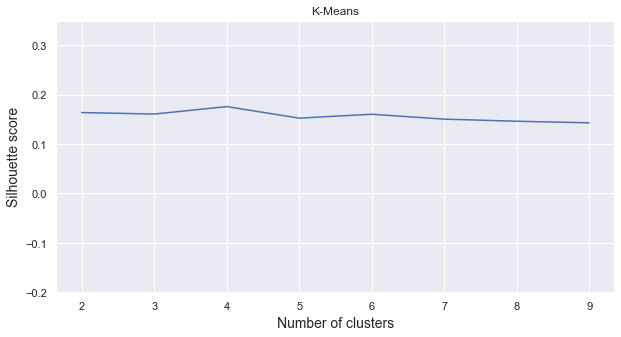

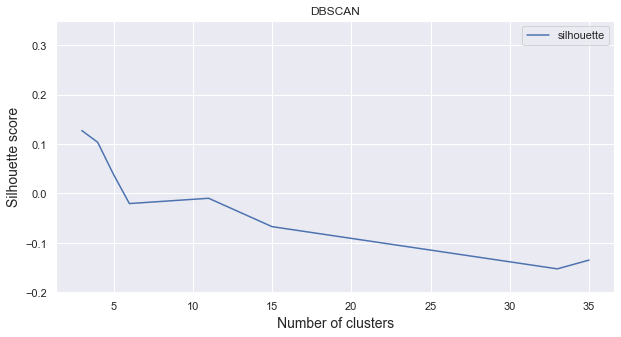

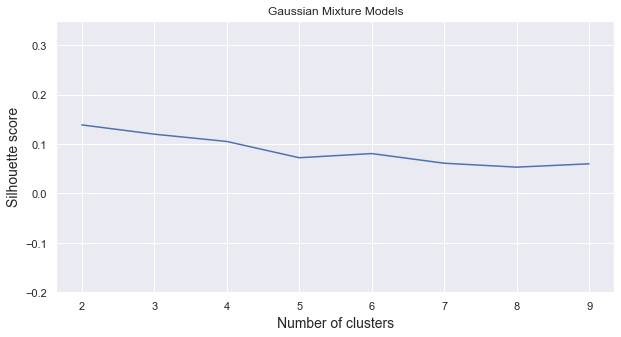

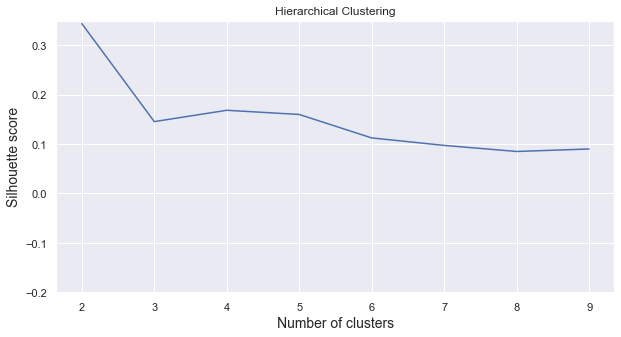

In [30]:
# plot
sns.set(rc = {'figure.figsize': (10, 5)}) 
plt.plot(np.arange(2, 10, 1), silhouette_k)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.xticks(np.arange(2, 10, 1))
plt.title('K-Means')
axes = plt.gca()
axes.set_ylim([-0.2,0.35])
plt.show()
dbscan_df = pd.DataFrame({'clusters': n_cluster_d, 'silhouette':silhouette_d})
dbscan_group = dbscan_df.loc[dbscan_df.groupby('clusters')['silhouette'].idxmax()]
dbscan_group.plot(x='clusters', y='silhouette', kind='line')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('DBSCAN')
axes = plt.gca()
axes.set_ylim([-0.2,0.35])
plt.show()
plt.plot(np.arange(2, 10, 1), silhouette_g)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.xticks(np.arange(2, 10, 1))
plt.title('Gaussian Mixture Models')
axes = plt.gca()
axes.set_ylim([-0.2,0.35])
plt.show()
plt.plot(np.arange(2, 10, 1), silhouette_h)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.xticks(np.arange(2, 10, 1))
plt.title('Hierarchical Clustering')
axes = plt.gca()
axes.set_ylim([-0.2,0.35])
plt.show()

In [31]:
dbscan = DBSCAN(eps=1.25, min_samples=15).fit(num_sc)
clusters = dbscan.labels_
labels=len(np.unique(dbscan.labels_))
silhouette_dbscan = silhouette_score(num_sc, clusters)
score_dbscan = {'labels':labels,'silhouette_score':silhouette_dbscan}
score_dbscan = pd.DataFrame(score_dbscan, columns=['labels','silhouette_score'], index=['dbscan'])

In [32]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(num_sc)
preds = kmeans.predict(num_sc)
labels=len(np.unique(preds))
silhouette_kmeans = silhouette_score(num_sc, preds)
score_kmeans = {'labels':labels,'silhouette_score':silhouette_kmeans}
score_kmeans = pd.DataFrame(score_kmeans, columns=['labels','silhouette_score'], index=['kmeans'])

In [33]:
gmm = GaussianMixture(n_components=2, random_state=0).fit(num_sc)
preds = gmm.predict(num_sc)
labels=len(np.unique(preds))
silhouette_gmm = silhouette_score(num_sc, preds)
score_gmm = {'labels':labels,'silhouette_score':silhouette_gmm}
score_gmm = pd.DataFrame(score_gmm, columns=['labels','silhouette_score'], index=['gmm'])

In [34]:
hierarch = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit(num_sc)
clusters = hierarch.labels_
labels=len(np.unique(hierarch.labels_))
silhouette_hc = silhouette_score(num_sc, clusters)
score_hc = {'labels':labels,'silhouette_score':silhouette_hc}
score_hc = pd.DataFrame(score_hc, columns=['labels','silhouette_score'], index=['hierarchical_clustering'])

### Scoring by chosen clusters

In [35]:
# scoring by chosen clusters
score = score_kmeans.append(score_dbscan)
score = score.append(score_gmm)
score = score.append(score_hc)
score

,labels,silhouette_score
kmeans,4,0.175795
dbscan,3,0.127336
gmm,2,0.138758
hierarchical_clustering,5,0.159866
